### Uma vez que a tabela gerada pelo Spark está salva no HDFS ou S3 podemos ler com python 
* ETL ---> Spark (PySpark)
* Análise exploratória, modelagem/Analytics ----> Python (Pandas, Scikitlearn, etc)

#### Importando Biblioteca de Funções Turing Lab e Turing IA

In [2]:
%run -i '/home/hadoop/.Turing/TuringAllFunctions.py'

------------- Turing Lab Data Science --------------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 04/05/2019 -------------------------------
----------------------------------------------------------
--- Consulte o manual de Biblioteca de Funções Turing: ---


----------------------------------------------------------


#### Gerando credenciais de acesso para lake

In [5]:
id_empresa = '1022'
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)

#### Lendo tabela gerada pelo ETL (PysPark)

In [9]:
nm_bucket = 'turing-bkt-treinamentos'
path_file = 'Treinamento/ETL/BrunoJ/ABT_CLI_EMP_PAG'
df_00 = TuringReadParquetFile(S3fs,nm_bucket,path_file)
df_00.shape

(25, 10)

In [10]:
df_00.head()

,PK_ID,VL_SCORE,VL_RENDA,QT_DIAS_JOINED_NOW,QT_EMP_HOME,QT_EMP_CRED,VL_MED_MISSED,VL_MED_REPAID,PK_DATREF,PK_DATPROC
0,35214,696,95849,5757,93,21,0.51,0.39,20190513,2019-05-13T15:56:06
1,44601,518,156341,5318,47,58,0.46,0.73,20190513,2019-05-13T15:56:06
2,26945,806,214516,6742,30,43,0.51,0.34,20190513,2019-05-13T15:56:06
3,49545,770,104564,4198,49,41,0.58,0.59,20190513,2019-05-13T15:56:06
4,49624,800,49036,2473,24,35,0.47,0.62,20190513,2019-05-13T15:56:06


#### Análise de Missings

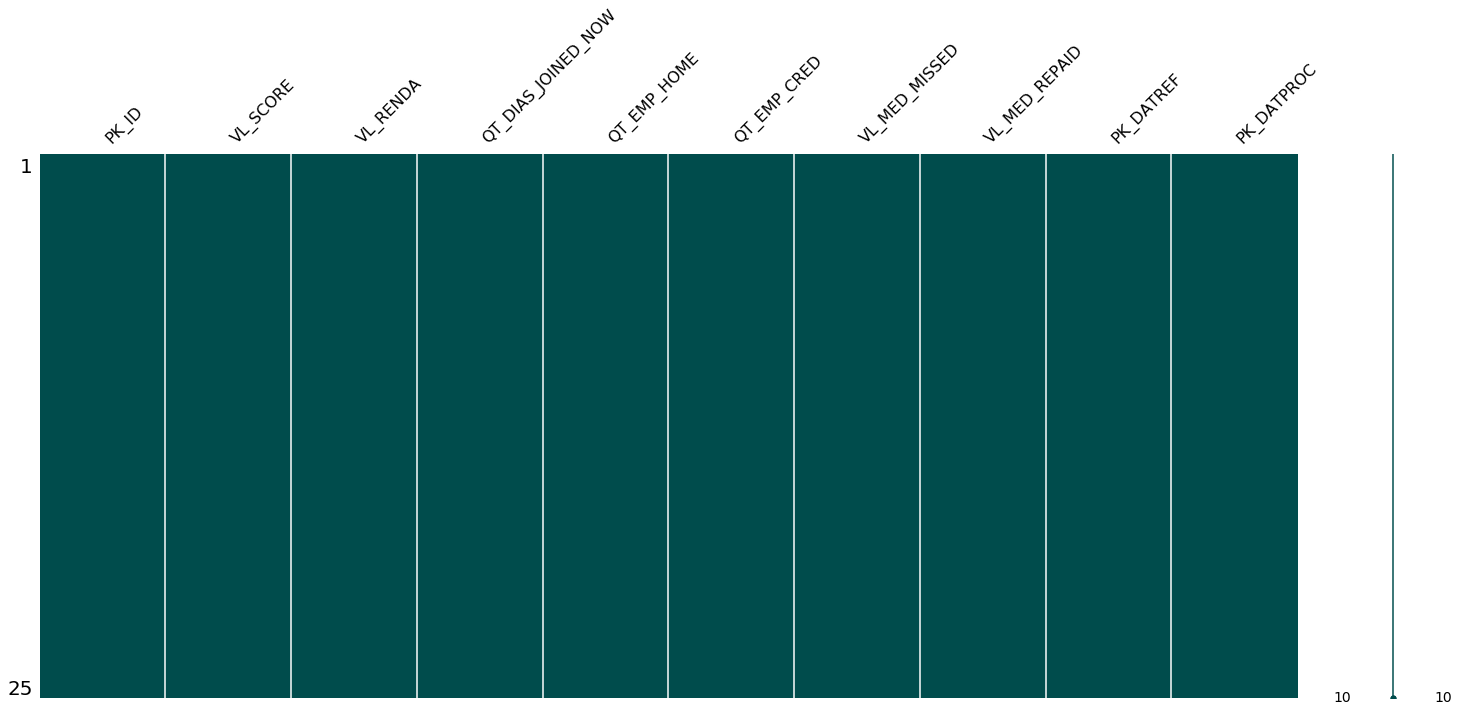

In [12]:
TuringMissingPlot(df_00)

#### Correlação de Pearson

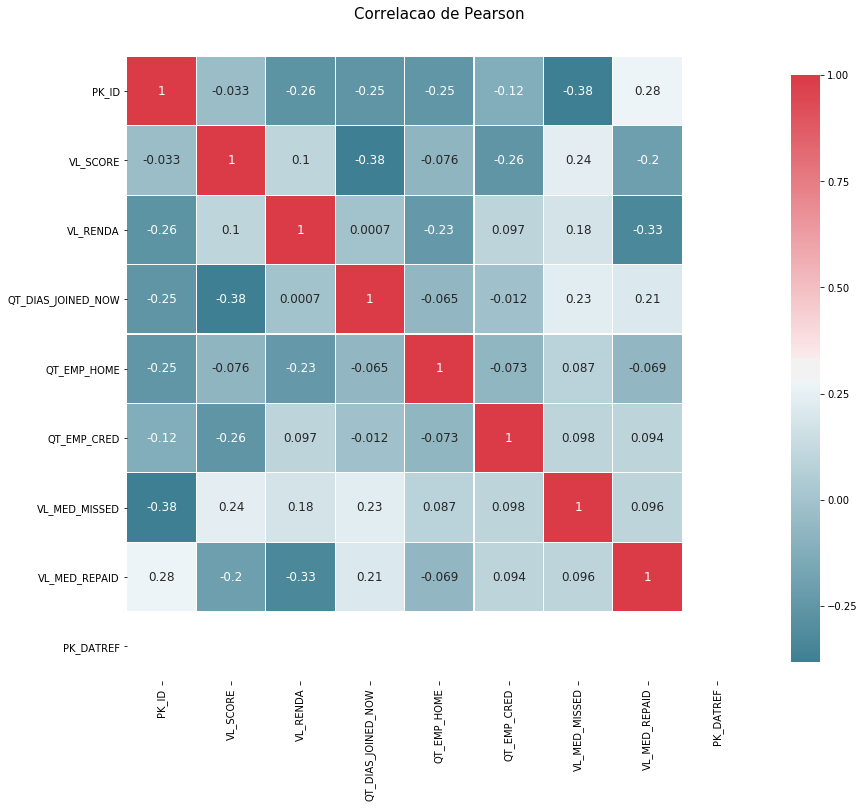

In [11]:
TuringPearsonCorr(df_00)

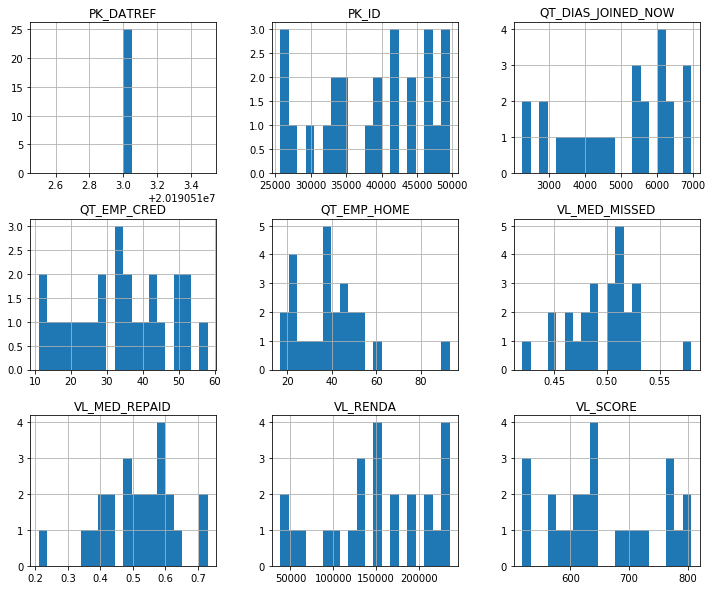

In [14]:
TuringHistogram(df_00)  

#### BoxPlot

In [39]:
lista_boxplot = ['QT_DIAS_JOINED_NOW']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

In [34]:
lista_boxplot = df_00.drop(['PK_DATPROC','PK_DATREF','PK_ID','VL_RENDA'],axis=1).columns

TuringBoxPlotIntVars(df_00,lista_boxplot) 

In [37]:
lista_boxplot = ['QT_EMP_CRED','QT_EMP_HOME']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

In [40]:
lista_boxplot = ['VL_MED_MISSED','VL_MED_REPAID']

TuringBoxPlotIntVars(df_00,lista_boxplot) 

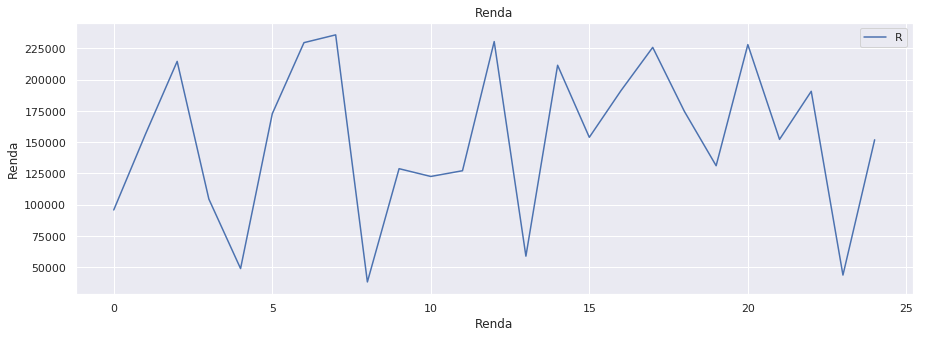

'TuringLinePlot'

In [72]:
TuringLinePlot(df_00,None,'VL_RENDA',5,15,'Renda','Renda','Renda','Renda')

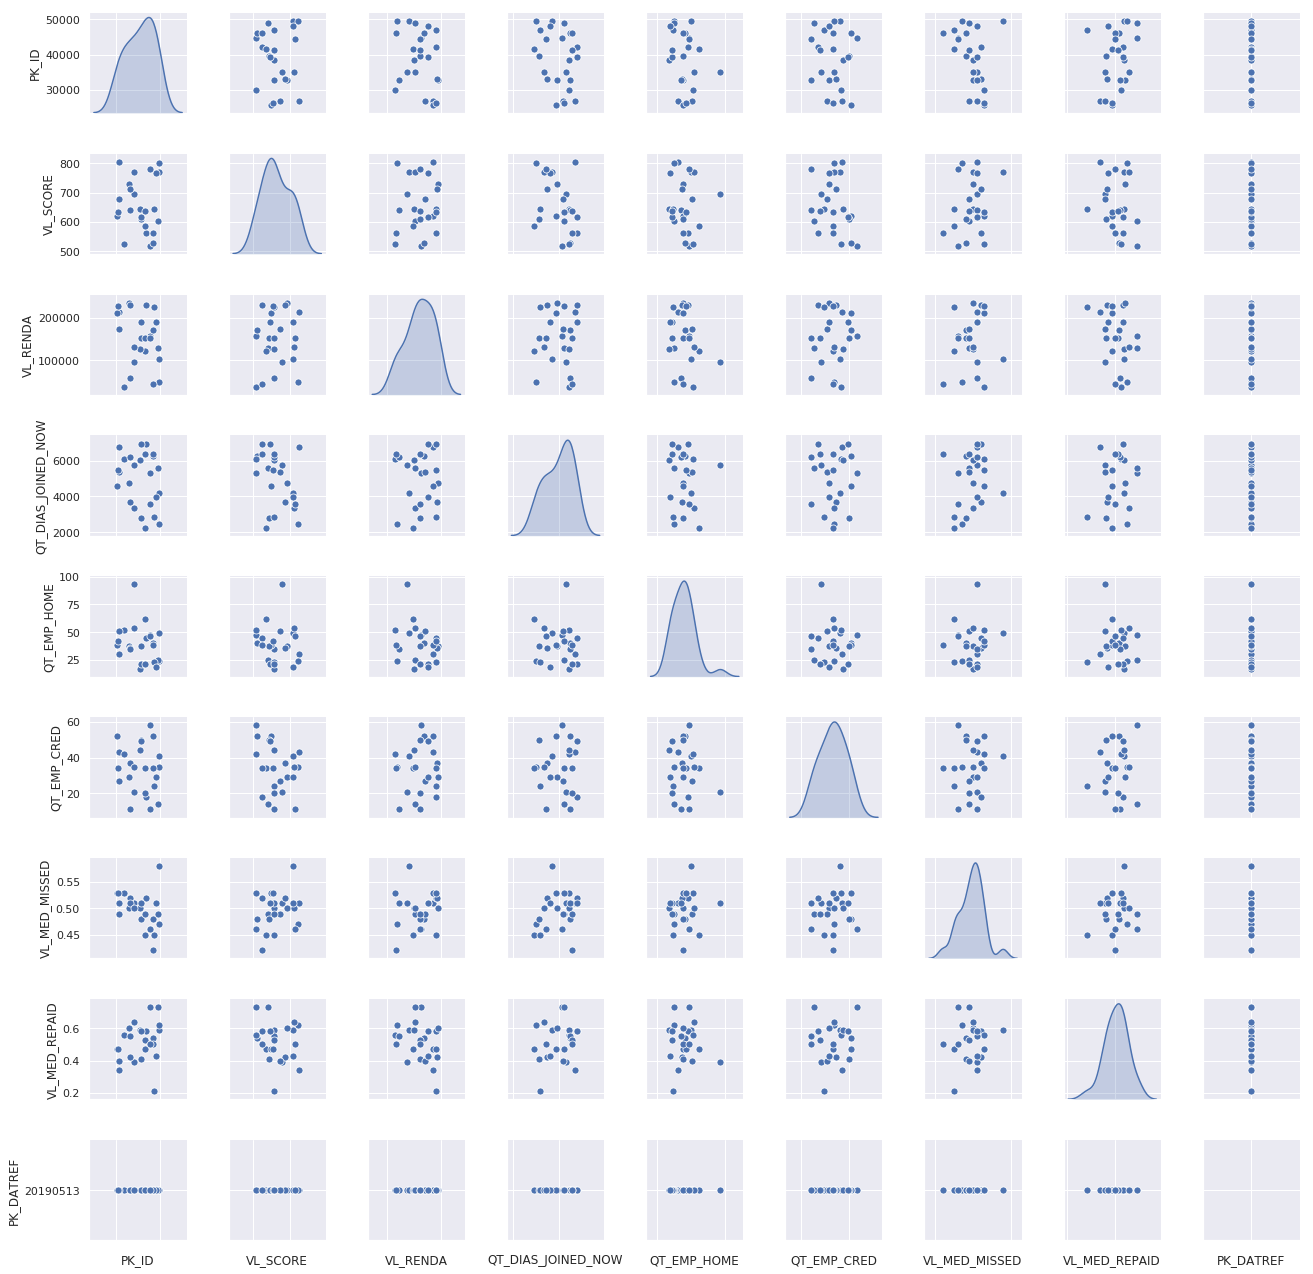

In [84]:
TuringDVPairPlot(df_00,sizegraph=2,plot_s = 50)

'TuringNormalProbPlot'

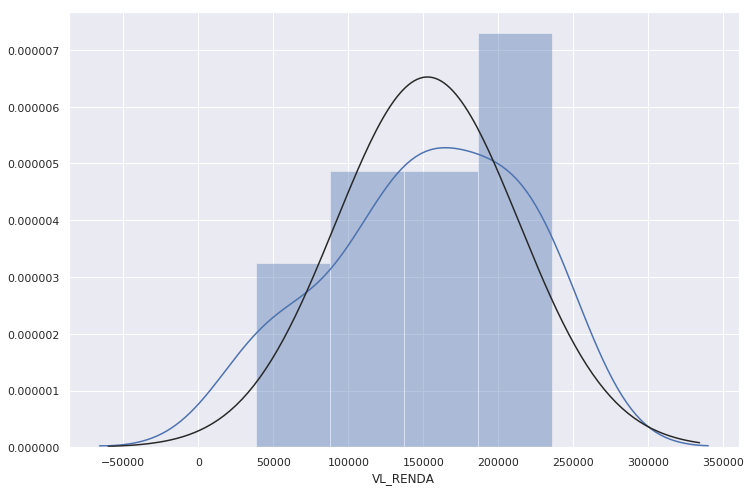

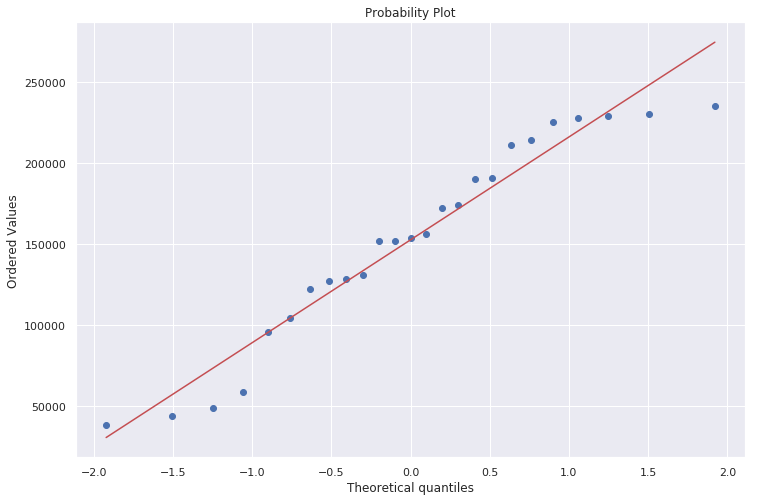

In [91]:
TuringNormalProbPlot(df_00,'VL_RENDA')

In [93]:
#Aplicando transformação log na variável 
df_00['VL_RENDA'] = np.log(df_00['VL_RENDA'])

'TuringNormalProbPlot'

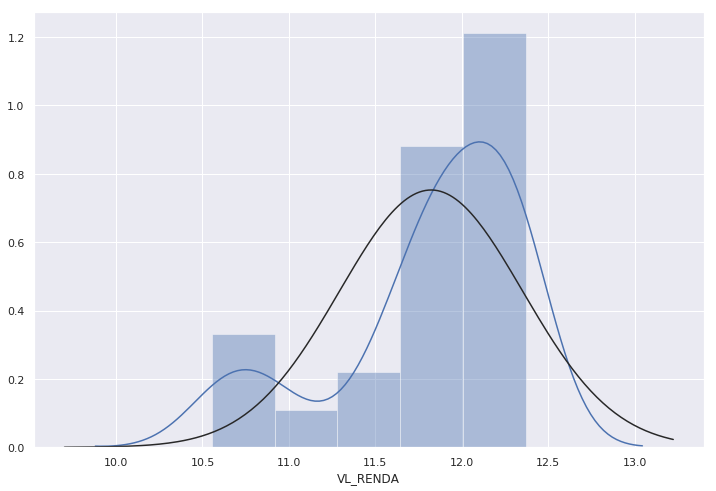

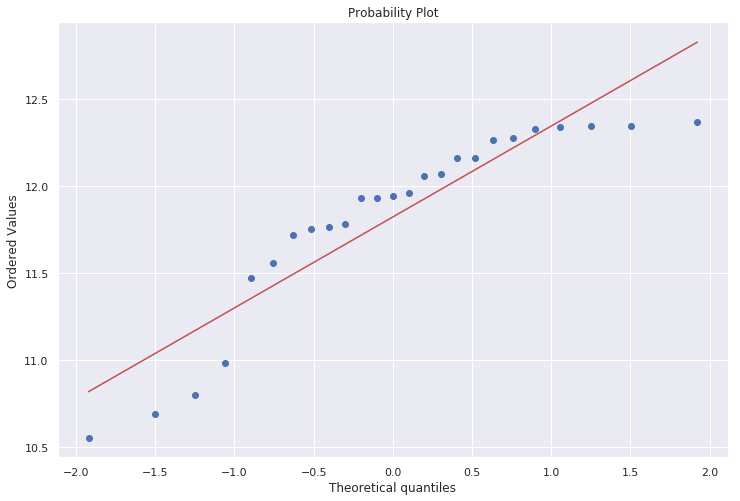

In [96]:
TuringNormalProbPlot(df_00,'VL_RENDA')

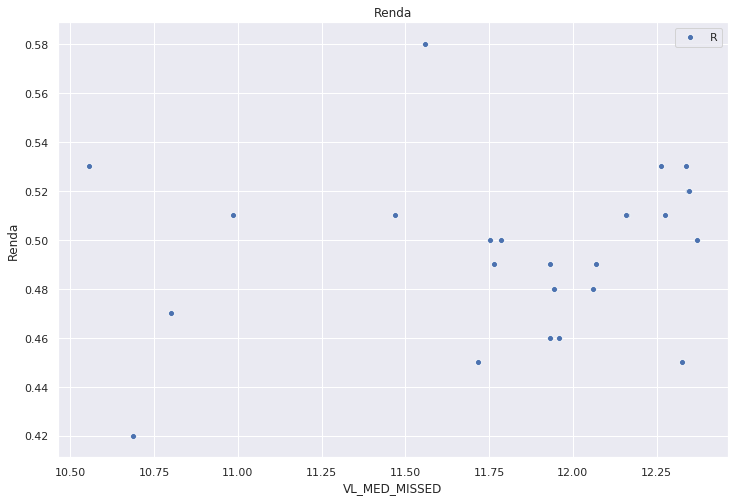

'TuringScatterPlot'

In [103]:
TuringScatterPlot(df_00,'VL_RENDA','VL_MED_MISSED',5,15,'VL_MED_MISSED','Renda','Renda','Renda')

### Salvar Tabela para AutoML - Turing IA

In [105]:
path_s3_wfile = 's3://'+nm_bucket+'/Projetos/'+'FLAT_TABLES/'
nm_s3_file = 'BJ_ABT01_20190513.csv'
TuringWriteS3File(df_00,path_s3_wfile,nm_s3_file,S3fs,delimiter=',')

'written successfully'

### Verifique se a tabela está disponível para Analytics no TuringLab

prod.labturing.com.br/turing